In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
csv = pd.read_csv('Batch Events Data04_06_2020 12_00 AM - 04_16_2020 12_00 AM.csv')

df = pd.DataFrame(csv)

df.eventNotes.value_counts()

In [ ]:
df1_cor = df.loc[df['eventNotes'].str.contains('DOC_PROCESSED|Successfully added|Successfully added|Successfully updated', na=False)]

df1_cor

In [ ]:
df1_cor[['EN', 'Doctype']] = df1_cor.pop('eventNotes').str.split('Document:', expand=True) 

In [ ]:
df1_cor.to_csv('Locating Correspondence for Molly 4_6_4_16.csv')

In [ ]:
# Indexing for Todd

# Op 1 period 3/13/2019 - 4/14/2020 

csv_doc_base = pd.read_csv('Batch Docs Data - Batch_ 121 - 142.csv')

csv_packet_base = pd.read_csv('Packet Data - Batch_ 121 - 142.csv')

df_doc_base = pd.DataFrame(csv_doc_base)

df_packet_base = pd.DataFrame(csv_packet_base)

df_packet_base



In [ ]:
csv_ev = pd.read_csv('Batch Events Data - Batch_ 121 - 142.csv')

batch_ev = pd.DataFrame(csv_ev)

batch_ev

In [ ]:
df_doc_off = df_doc_base[df_doc_base['docStatus']=='OFFRAMPED']

In [ ]:
merge_off = pd.merge(batch_ev, df_doc_off, how='inner', on='docId')

merge_no_error = merge_off[~merge_off['eventNotes'].str.contains('error|Error')]

merge_no_error.to_csv('Off_ramp_no_error.csv')

merge_no_error

In [ ]:
merge = pd.merge(df_doc_base,df_packet_base,left_on='packetId', right_on='packetId' , how='inner', indicator = True)

merge = merge.drop(['poaId', 'ecmDocId', 'source', 'vendorDocumentId', 'recDate',
       'contentionField1', 'contentionField2', 'contentionField3',
       'contentionField4', 'contentionField5', 'contentionField6',
       'contentionField7', 'contentionField8', 'contentionField9',
       'cmUploadErrorCode', 'cmUploadErrorDescription',
       'cmUploadTransmissionCode', 'd2dClaimId', 'd2dNumPages', 'isAe',
       'creationDatetime_x', 'createdBy_x', 'lastUpdatedDatetime_x',
       'lastUpdatedBy_x', 'docUrl', 'datacapBatchId', 'batchId_x', 'batchId_y',
       'originalQueue', 'originalQueueLocation',
       'emergage', 'confirmationNum', 'assignedUser', 'vendorId',
       'vaDateOfReceipt','docTypeCode',
       'docTypeId_y', 'portalEntryDate',
       'queueEntryDate', 'vbmsUpoadQueueEntryDate', 'vbmsUpoadCompletionDate',
       'creationDatetime_y', 'createdBy_y', 'lastUpdatedDatetime_y',
       'lastUpdatedBy_y'], axis=1)





In [ ]:
merge.to_csv('merged.csv')

merge

In [ ]:
merge_096 = merge[merge['docName'].str.contains('VA 21-0966 Intent to File')]


merge_096_1 = merge_096[merge_096['packetStatus']=='PROCESSED']


merge_096_1 = merge_096_1[merge_096_1['docStatus']=='PROCESSED']


#merge_096_pen = merge_096[merge_096['packetStatus']=='PROCESSED']

#merge_096_pen = merge_096_pen[merge_096_pen['docStatus']=='PENDINGUPLOAD']




merge_96_2 = merge_096[merge_096['packetStatus']=='PROCESSING']

merge_96_2= merge_96_2[merge_96_2['docStatus']=='PROCESSED']

len(merge_096_1)


In [ ]:
merge_21 = merge[merge['docName'].str.contains('21-22')]


merge_21_1 = merge_21[merge_21['packetStatus'].isin(['OFF RAMPED', 'PROCESSING', 'PROCESSED','PARTIALLY PROCESSED'])]


merge_21_1 = merge_21_1[merge_21_1['docStatus'].isin(['PROCESSED'])]


len(merge_21_1)


In [ ]:
merge_ret = merge[merge['docName'].str.contains('Returned Mail')]


merge_ev_1 = merge_ret[merge_ret['packetStatus'].isin(['PROCESSED', 'PROCESSING', 'OFF RAMPED'])]


merge_ev_1 = merge_ev_1[merge_ev_1['docStatus']=='PROCESSED']


len(merge_ev_1)



In [ ]:
#Evidence Mail


csvev = pd.read_csv('Copy of eligible Documents.csv')

dfev =pd.DataFrame(csvev)

dfev


In [ ]:
merge['docName'] = merge['docName'].str.replace('.pdf','', regex=True)




In [ ]:
new_types = []

for x in merge['docName'].tolist():
    if x in dfev.Doctypes.tolist():
        new_types.append(x)
    else:
        new_types.append('NAN')
        
new_types

In [ ]:
merge['Evidence'] = new_types

merge_ev = merge[merge['Evidence']!='NAN']

merge_ev =  merge_ev[merge_ev['docStatus'].str.contains('PROCESSED')]

merge_ev = merge_ev[merge_ev['packetStatus'].str.contains('PROCESSED')]

len(merge_ev)

In [ ]:
merge_no_nan = merge[merge['Evidence']!='NAN']

#merge_no_nan.to_csv('merge_no_nan.csv')

In [ ]:
merge_ev_1 = pd.merge(dfev, merge, left_on='Doctypes', right_on='docName', how='inner', indicator ='YETS')

In [ ]:
merge_ev_2 =  merge_ev_1.loc[merge_ev_1['docStatus'].str.contains('PROCESSED')]

merge_ev_2 = merge_ev_2.loc[merge_ev_2['packetStatus'].str.contains('OFF RAMPED')]

len(merge_ev_2)


In [ ]:
#OP1 Transactions

batch_pack = pd.read_csv('Packet Data - Batch_ 121 - 142.csv')

batch_pack_df = pd.DataFrame(batch_pack)

op1 = pd.read_csv('OP1 Transactions .csv')

dfop1 = pd.DataFrame(op1)

dfop1

In [ ]:
merge_op1 = pd.merge( dfop1, batch_pack_df, left_on='CM_PACKET_NUM', right_on='cmPacketNum', how='left', indicator=True )

In [ ]:
merge_op1 = merge_op1[merge_op1['_merge']=='left_only']

merge_op1


In [ ]:
merge_op1.to_csv('merge_op1.csv')

In [10]:
csv1 = pd.read_excel('../Prod_Runs/5-26-20 Prod Combined Run.xlsx', sheet_name='Packets and Docs')

df1 = pd.DataFrame(csv1)




,BATCH_ID,CM_PACKET_NUM,PACKET_STATUS,Packet Last Updated,PACKET_ELIGIBLE,DOC_ID,DOC_NAME,DOC_STATUS,Doc Last Updated,DOC_TYPE_CODE,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,157,9290812,OFF RAMPED,2020-05-27 04:48:28.690,Eligible,819164,VA 21-0966 Intent to File.pdf,OFFRAMPED,2020-05-27 04:47:11.830,966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,157,9290812,OFF RAMPED,2020-05-27 04:48:28.690,Eligible,819164,VA 21-0966 Intent to File.pdf,OFFRAMPED,2020-05-27 04:47:11.830,966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,157,21238017,OFF RAMPED,2020-05-27 04:16:40.990,Eligible,818782,VA 21-0966 Intent to File.pdf,OFFRAMPED,2020-05-27 04:15:26.000,966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,157,21238017,OFF RAMPED,2020-05-27 04:16:40.990,Eligible,818782,VA 21-0966 Intent to File.pdf,OFFRAMPED,2020-05-27 04:15:26.000,966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,157,9290740,PROCESSED,2020-05-27 04:23:34.880,Eligible,818767,Certificate of Release or Discharge From Activ...,PROCESSED,2020-05-27 04:22:25.760,OMPF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,157,21238006,OFF RAMPED,2020-05-27 04:18:32.180,Eligible,818765,VA 21-4138 Statement In Support of Claim.pdf,OFFRAMPED,2020-05-27 04:17:14.110,4138,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,157,21238006,OFF RAMPED,2020-05-27 04:18:32.180,Eligible,818765,VA 21-4138 Statement In Support of Claim.pdf,OFFRAMPED,2020-05-27 04:17:14.110,4138,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,157,21238006,OFF RAMPED,2020-05-27 04:18:32.180,Eligible,818765,VA 21-4138 Statement In Support of Claim.pdf,OFFRAMPED,2020-05-27 04:17:14.110,4138,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,157,21238009,PROCESSED,2020-05-27 04:19:53.810,Eligible,818763,Correspondence.pdf,PROCESSED,2020-05-27 04:18:51.350,EVD-COR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,157,21237937,OFF RAMPED,2020-05-27 04:19:02.270,Eligible,818750,Correspondence.pdf,OFFRAMPED,2020-05-27 04:17:47.780,EVD-COR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
csv2 = pd.read_excel('../Prod_Runs/5-27-20 Prod Combined Run.xlsx', sheet_name='Packets and Docs')

df2 = pd.DataFrame(csv1)


Eligible    21150
Name: PACKET_ELIGIBLE, dtype: int64

In [7]:
csv3 = pd.read_excel('../Prod_Runs/5-28-20 Prod Combined Run.xlsx', sheet_name='Packets and Docs')

df3 = pd.DataFrame(csv1)

In [21]:
merge_3 = pd.concat([csv1,csv2,csv3])

nin_sx = merge_3[merge_3['DOC_NAME']=='VA 21-0966 Intent to File.pdf']

In [22]:
status.nin_sx

NameError: name 'status' is not defined

In [23]:
nin_sx['Packet Last Updated'] = pd.to_datetime(nin_sx['Packet Last Updated'])

times= nin_sx['Packet Last Updated']

times = pd.DatetimeIndex(times)

C:\Users\VAAACShuffM1\Downloads\Conda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


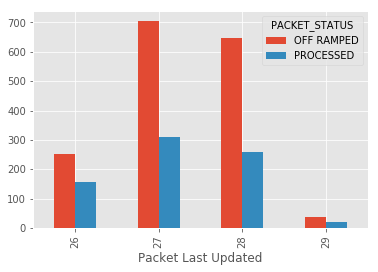

In [34]:
grouped = nin_sx.groupby([times.day, 'PACKET_STATUS']).size().unstack()

grouped.plot(kind='bar')

plt.style.use('ggplot')

In [38]:
len_pro = len(nin_sx[nin_sx['DOC_STATUS']=='PROCESSED'])

len_all = len(nin_sx)

percs = len_pro/len_all

percs = percs*100


In [39]:
percs

31.48846960167715